In [1]:
import pandas as pd
import numpy as np

In [10]:
path = '/home/nicobruno/flor/Tesis/excels/'
sujeto = 'S_02_visual'
medicion = pd.read_csv(path + sujeto + '.csv',delimiter=';')
#COLUMNAS_INTERESANTES = ['cor_ans', 'obj_rating', 'subj_rating']
COLUMNAS_INTERESANTES = ['subj_rating']
print(medicion)

     Unnamed: 0 subject stim session  block  frame_rate  \
0             0    S_02    A     pre      1   59.828866   
1             1    S_02    A     pre      1   59.828866   
2             2    S_02    A     pre      1   59.828866   
3             3    S_02    A     pre      1   59.828866   
4             4    S_02    A     pre      1   59.828866   
..          ...     ...  ...     ...    ...         ...   
395         395    S_02    A     pre      4   59.828866   
396         396    S_02    A     pre      4   59.828866   
397         397    S_02    A     pre      4   59.828866   
398         398    S_02    A     pre      4   59.828866   
399         399    S_02    A     pre      4   59.828866   

                                             frame_int  trial_nb  SOA  \
0    [0.015397499999835418, 0.017128100000036284, 0...        94    3   
1    [0.017229000000043015, 0.01653929999997672, 0....        68    4   
2    [0.016980300000113857, 0.016395699999975477, 0...        54    2   

In [11]:
datos = medicion[COLUMNAS_INTERESANTES]
#datos.loc[:, "obj_rating"] = datos["obj_rating"].str[2:-2]
datos

,subj_rating
0,0
1,0
2,0
3,1
4,0
...,...
395,0
396,1
397,1
398,1


In [69]:
path = '/home/nicobruno/flor/Tesis/vectores/'
#pd.DataFrame(datos, columns='subj').to_csv(path + sujeto +'_subj'+ '.csv', index=False)
datos.to_csv(path + sujeto +'_subj'+ '.csv', index = False)

In [40]:
#DIFEERENTES FORMAS DE HACERLO
#for obj_rating in datos["obj_rating"]:
#    print(obj_rating[2:-2])

#datos["obj_rating"].apply(lambda obj_rating: obj_rating[2:-2])

In [69]:
vio = datos[datos['subj_rating']==1]
no_vio = datos[datos['subj_rating']==0]

vio_left = vio[vio['obj_rating']=='left']
correcto_left = vio_left[vio_left['cor_ans']=='left']

vio_right = vio[vio['obj_rating']=='right']
correcto_right = vio_right[vio_right['cor_ans']=='right']

correcto_no_vio = no_vio[no_vio['cor_ans'].isna()]

In [70]:
resultados = correcto_left + correcto_right + correcto_no_vio
resultados['correcto'] = 1
print(resultados)
resultados.drop(columns=['cor_ans', 'obj_rating', 'subj_rating'], inplace=True)
resultados = datos.merge(resultados, left_index=True, right_index=True, how="left")
resultados['correcto'] = resultados['correcto'].mask(resultados['correcto'].isna(),0).astype(int)

    cor_ans obj_rating  subj_rating  correcto
0       NaN        NaN          NaN         1
3       NaN        NaN          NaN         1
5       NaN        NaN          NaN         1
7       NaN        NaN          NaN         1
8       NaN        NaN          NaN         1
..      ...        ...          ...       ...
394     NaN        NaN          NaN         1
395     NaN        NaN          NaN         1
396     NaN        NaN          NaN         1
397     NaN        NaN          NaN         1
399     NaN        NaN          NaN         1

[208 rows x 4 columns]


In [71]:
vectores = 'Vectores/'
matrices = 'Matrices/'
resultados.to_csv(path + matrices + sujeto + '.csv', index = False)
resultados['correcto'].to_csv(path + vectores + sujeto + '.csv', index = False)

---

In [55]:
#OTRA FORMA DE HACERLO
datos_juampi = medicion.copy(deep=True)
datos_juampi["correcto"] = 0

hubo_ruido_mask = datos_juampi["cor_ans"].isna()
no_vio_mask = datos_juampi["subj_rating"] == 0
vio_mask = datos_juampi["subj_rating"] == 1
le_pego_mask = datos_juampi["cor_ans"] == datos_juampi["obj_rating"].str[2:-2]

datos_juampi.correcto = datos_juampi.correcto.mask(((no_vio_mask & hubo_ruido_mask) | (vio_mask & le_pego_mask)), 1)
datos_chill = datos_juampi[["obj_rating", "subj_rating", "cor_ans"]]
datos_chill["vio_incorrecto"] = ((datos_chill.subj_rating == 1) & (datos_chill.obj_rating.str[2:-2] != datos_chill.cor_ans))
datos_chill["vio_correcto"] = (((datos_chill.subj_rating == 0) & (datos_chill.cor_ans == "a")) | ((datos_chill.subj_rating == 1) & (datos_chill.obj_rating.str[2:-2] == datos_chill.cor_ans)))
total_true = datos_chill[['vio_incorrecto', 'vio_correcto']].sum().sum()
total_true

/tmp/ipykernel_3800/565584011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_chill["vio_incorrecto"] = ((datos_chill.subj_rating == 1) & (datos_chill.obj_rating.str[2:-2] != datos_chill.cor_ans))
/tmp/ipykernel_3800/565584011.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_chill["vio_correcto"] = (((datos_chill.subj_rating == 0) & (datos_chill.cor_ans == "a")) | ((datos_chill.subj_rating == 1) & (datos_chill.obj_rating.str[2:-2] == datos_chill.cor_ans)))


206

In [56]:
medicion

,Unnamed: 0,subject,stim,session,block,frame_rate,frame_int,trial_nb,SOA,real_SOA,target,mask,position,cor_ans,obj_rating,obj_RT,subj_rating,subj_RT,trial_duration,trigger
0,0,S_02,A,pre,1,59.828866,"[0.015397499999835418, 0.017128100000036284, 0...",94,3,0.050571,blank.tiff,mask.tiff,-0.14,a,['left'],0.905389,0,1.420,4.178555,48
1,1,S_02,A,pre,1,59.828866,"[0.017229000000043015, 0.01653929999997672, 0....",68,4,0.049105,7.tif,mask.tiff,-0.14,right,['left'],0.859481,0,1.034,3.726069,70
2,2,S_02,A,pre,1,59.828866,"[0.016980300000113857, 0.016395699999975477, 0...",54,2,0.050289,8.tif,mask.tiff,-0.14,right,['left'],1.066134,0,0.972,3.883146,40
3,3,S_02,A,pre,1,59.828866,"[0.01609469999993962, 0.01672410000014679, 0.0...",74,5,0.050307,3.tif,mask.tiff,-0.14,left,['left'],0.422459,1,0.658,2.922623,84
4,4,S_02,A,pre,1,59.828866,"[0.016082500000038635, 0.017386499999929583, 0...",7,1,0.050679,8.tif,mask.tiff,0.14,right,['right'],0.932496,0,0.833,3.600194,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,S_02,A,pre,4,59.828866,"[0.016995400000269, 0.016739700000471203, 0.01...",72,5,0.049922,2.tif,mask.tiff,-0.14,left,['right'],4.350200,0,0.916,7.100204,82
396,396,S_02,A,pre,4,59.828866,"[0.01665969999976369, 0.016895699999622593, 0....",63,3,0.049874,8.tif,mask.tiff,0.14,right,['right'],2.577179,1,2.161,6.577304,57
397,397,S_02,A,pre,4,59.828866,"[0.01705339999989519, 0.016399600000113423, 0....",71,4,0.049618,8.tif,mask.tiff,0.14,right,['right'],0.200491,1,1.107,3.149992,73
398,398,S_02,A,pre,4,59.828866,"[0.01665709999997489, 0.016574999999647844, 0....",26,4,0.049718,3.tif,mask.tiff,-0.14,left,['left'],1.387878,1,0.911,4.137017,68


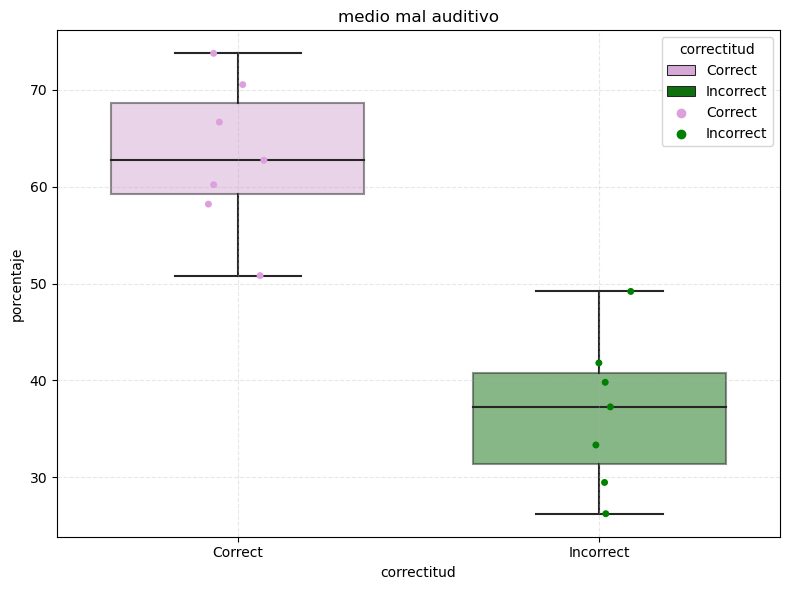

In [89]:
import numpy as np
from numpy import genfromtxt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sujnum = ['02', '03','04','05', '09','10','12']
data = {'Correct': [], 'Incorrect': []}
task = "auditivo"

for s in sujnum:
    path = '/home/nicobruno/flor/Tesis/excels/'
    medicion = pd.read_csv(path + "S_"+s+'_'+task+'.csv',delimiter=';')
    
    medicion["vio_incorrecto"] = ((medicion.subj_rating == 1) & (medicion.obj_rating.str[2:-2] != medicion.cor_ans))
    medicion["vio_correcto"] = (((medicion.subj_rating == 0) & (medicion.cor_ans == "a")) | ((medicion.subj_rating == 1) & (medicion.obj_rating.str[2:-2] == medicion.cor_ans)))

    Correctos = medicion['vio_correcto'].sum()
    Incorrectos = medicion['vio_incorrecto'].sum()
    Total= Correctos + Incorrectos
    
    total_correctos = Correctos / Total * 100
    total_incorrectos = Incorrectos / Total * 100
    
    data['Correct'].append(total_correctos)
    data['Incorrect'].append(total_incorrectos)

# Crear un mapa de posiciones numéricas para los grupos
group_positions = {'A': 0, 'B': 1}
offsets = {'A': -0.1, 'B': 0.0}
xvalues = ["A", "B"]
palette = ['plum', 'g']


fig, ax = plt.subplots(figsize=(8, 6))
data_df = pd.DataFrame(data).melt(var_name="correctitud", value_name="porcentaje")


# Boxplot con transparencia en el relleno
sns.boxplot(data=data_df, x='correctitud', y='porcentaje', hue='correctitud', palette=palette,
            width=0.7, dodge=False, ax=ax, zorder=1, boxprops=dict(alpha=.5))

# Puntos individuales (stripplot)
sns.stripplot(
    x='correctitud', 
    y='porcentaje',
    hue="correctitud",
    palette=palette,
    data=data_df, 
    jitter=True, 
    zorder=2,
    ax=ax
)

plt.title('medio mal auditivo')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

fig.savefig('/home/nicobruno/flor/Tesis/graficos/boxplot_comparacion_medio_correctos_auditivo.png')

In [ ]:
data_df = pd.DataFrame(data).melt(var_name="correctitud", value_name="porcentaje")

,correctitud,porcentaje
0,Correctos,62.732919
1,Correctos,58.199357
2,Correctos,73.762376
3,Correctos,60.197368
4,Correctos,50.815217
5,Correctos,70.535714
6,Correctos,66.666667
7,Incorrectos,37.267081
8,Incorrectos,41.800643
9,Incorrectos,26.237624


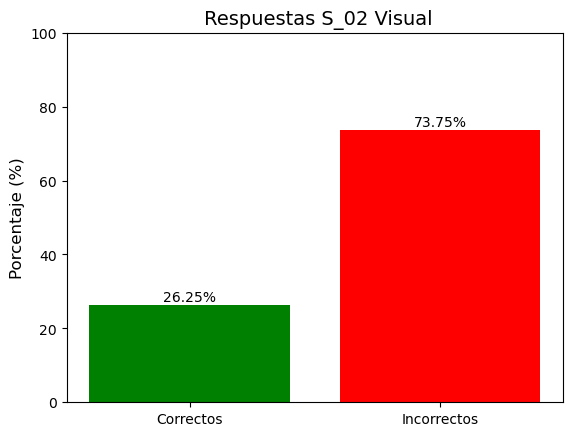

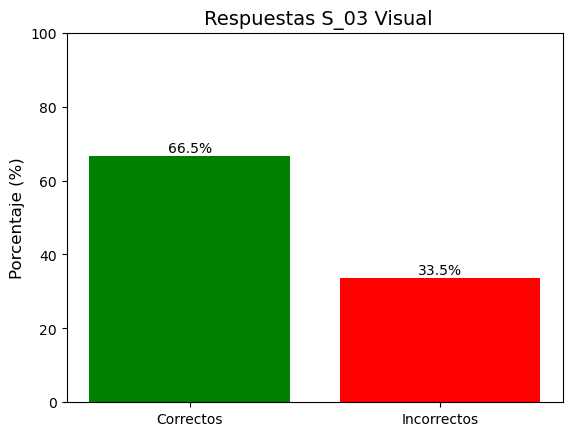

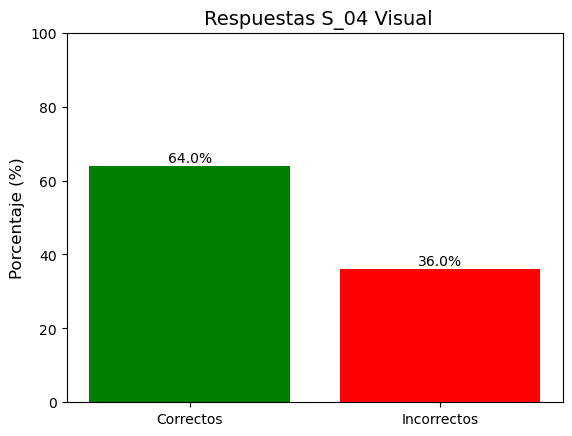

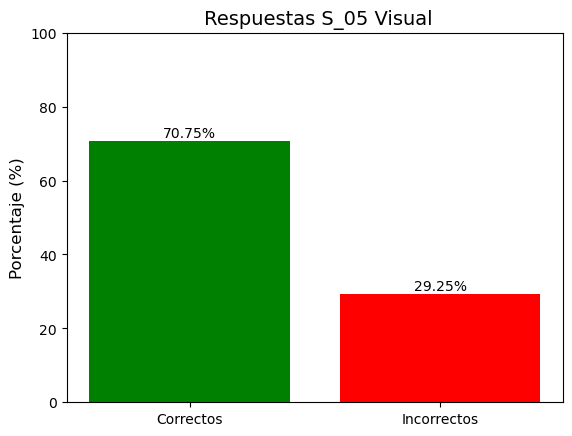

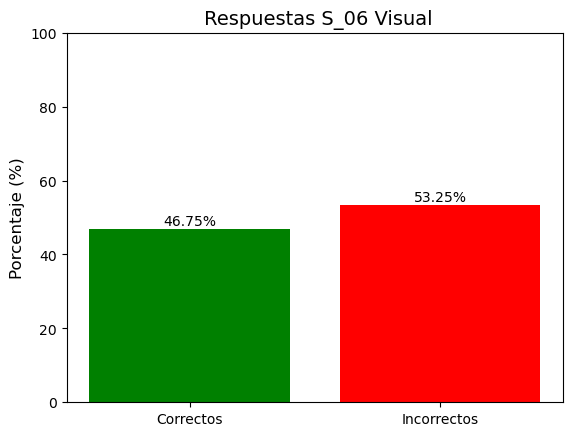

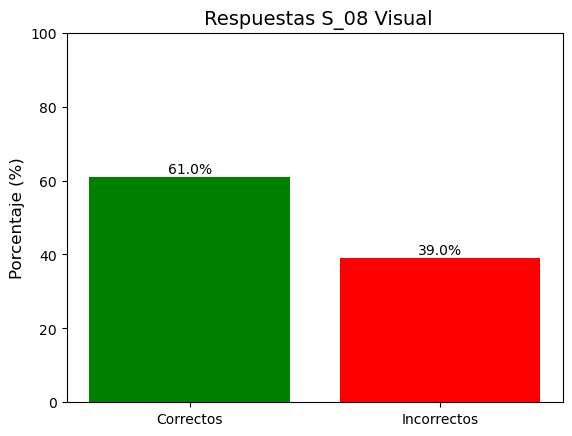

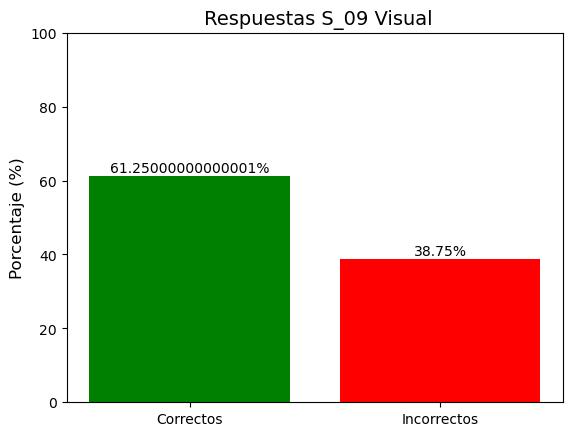

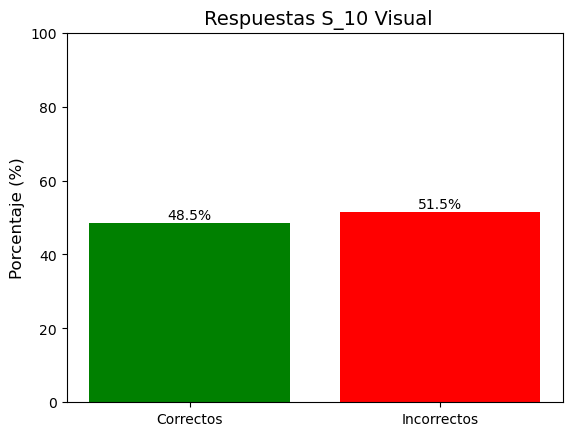

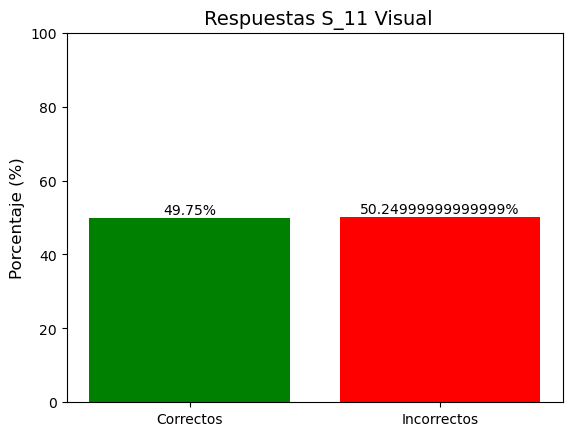

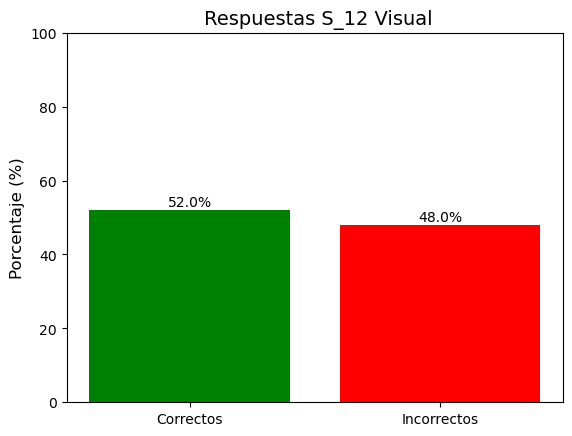

In [6]:
import matplotlib.pyplot as plt
from numpy import genfromtxt

subj_id = ['S_02','S_03', 'S_04', 'S_05','S_06', 'S_08', 'S_09', 'S_10', 'S_11', 'S_12']


num = -1
for s in subj_id:
    num = num+1
    Correctos = 0
    Incorrectos = 0
    Total = 0

    filename = '/home/nicobruno/flor/Tesis/vectores/'+s+'_visual.csv'
    df = genfromtxt(filename, skip_header = 1, delimiter=',')

    for i in np.arange(len(df)):
        Total +=1
        if df[i]==1:
            Correctos +=1
        else:
            Incorrectos +=1
    total_correctos = Correctos/Total*100
    total_incorrectos = Incorrectos/Total*100

    categorias = ['Correctos', 'Incorrectos']
    porcentajes = [total_correctos, total_incorrectos]  

    plt.bar(categorias, porcentajes, color=['green', 'red'])

    plt.title(' Respuestas '+s+' Visual', fontsize=14)
    plt.ylabel('Porcentaje (%)', fontsize=12)

    for i, porcentaje in enumerate(porcentajes):
        plt.text(i, porcentaje + 1, f'{porcentaje}%', ha='center', fontsize=10)


    plt.ylim(0, 100) 
    #plt.savefig('/home/nicobruno/flor/Tesis/graficos/porcentaje_'+s+'_visual.png')
    plt.show()


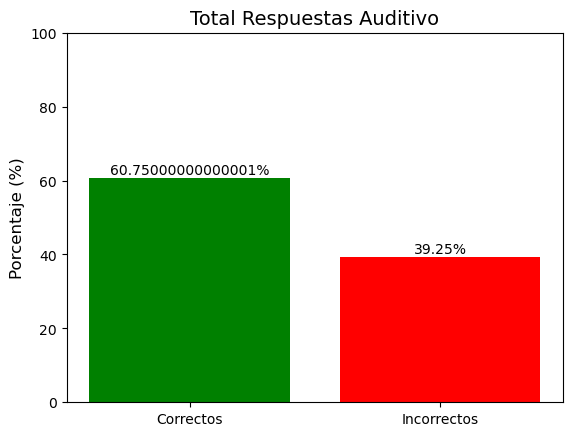

In [64]:
subj_id = ['S_02','S_03', 'S_04', 'S_05','S_06', 'S_08', 'S_09', 'S_10', 'S_11', 'S_12']
Correctos = 0
Incorrectos = 0
Total = 0

num = -1
for s in subj_id:
    num = num+1
    filename = '/home/nicobruno/flor/Tesis/vectores/'+s+'_auditivo.csv'
    df = genfromtxt(filename, skip_header = 1, delimiter=',')

    for i in np.arange(len(df)):
        Total +=1
        if df[i]==1:
            Correctos +=1
        else:
            Incorrectos +=1

total_correctos = Correctos/Total*100
total_incorrectos = Incorrectos/Total*100

categorias = ['Correctos', 'Incorrectos']
porcentajes = [total_correctos, total_incorrectos]  

plt.bar(categorias, porcentajes, color=['green', 'red'])

plt.title('Total Respuestas Auditivo', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=12)

for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje + 1, f'{porcentaje}%', ha='center', fontsize=10)


plt.ylim(0, 100) 
plt.savefig('/home/nicobruno/flor/Tesis/graficos/porcentaje_total_auditivo.png')
plt.show()

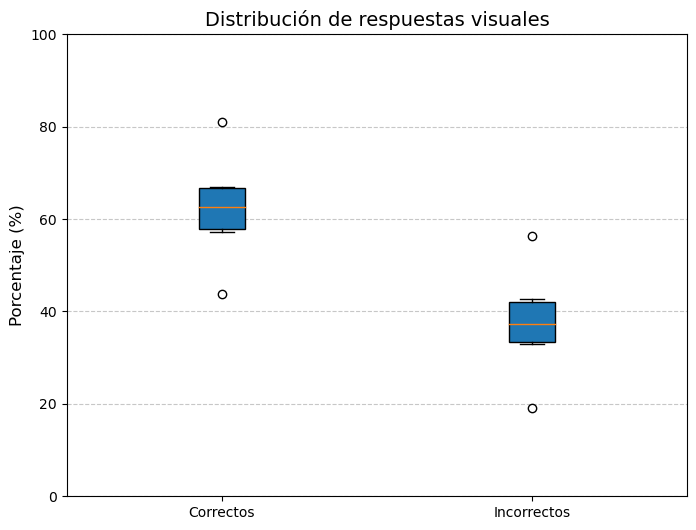

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

subj_id = ['S_02', 'S_03', 'S_04', 'S_05', 'S_09', 'S_10', 'S_12']

data = {'Correctos': [], 'Incorrectos': []}

for s in subj_id:
    filename = f'/home/nicobruno/flor/Tesis/vectores/{s}_auditivo.csv'
    df = genfromtxt(filename, skip_header=1, delimiter=',')
    
    Correctos = np.sum(df == 1)
    Incorrectos = np.sum(df != 1)
    Total = len(df)
    
    total_correctos = Correctos / Total * 100
    total_incorrectos = Incorrectos / Total * 100
    
    data['Correctos'].append(total_correctos)
    data['Incorrectos'].append(total_incorrectos)

plt.figure(figsize=(8, 6))
plt.boxplot([data['Correctos'], data['Incorrectos']], labels=['Correctos', 'Incorrectos'], patch_artist=True)
plt.title('Distribución de respuestas visuales', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig('/home/nicobruno/flor/Tesis/graficos/boxplot_respuestas_visual.png')
plt.show()


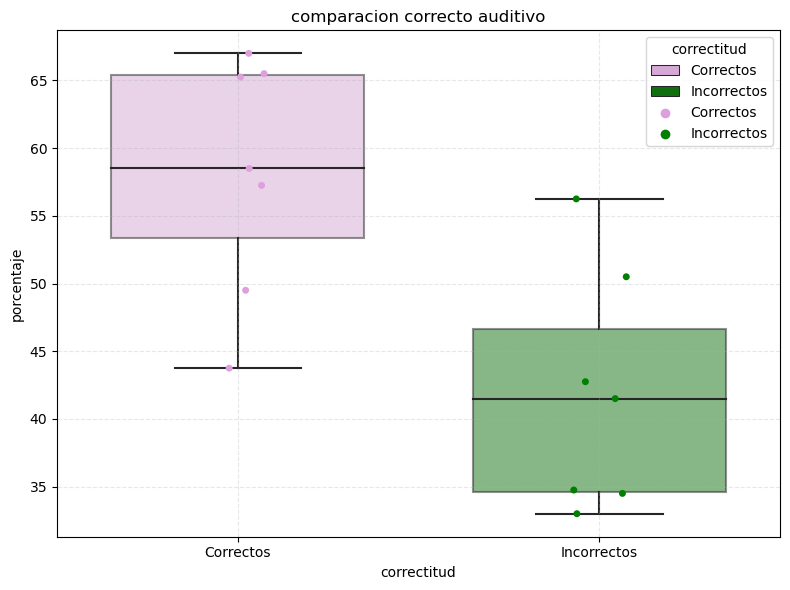

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

subj_id = ['S_02', 'S_03', 'S_04', 'S_05', 'S_09', 'S_10', 'S_12']

data2 = {'Correctos': [], 'Incorrectos': []}

for s in subj_id:
    filename = f'/home/nicobruno/flor/Tesis/vectores/{s}_auditivo.csv'
    df = genfromtxt(filename, skip_header=1, delimiter=',')
    
    Correctos = np.sum(df == 1)
    Incorrectos = np.sum(df != 1)
    Total = len(df)
    
    total_correctos = Correctos / Total * 100
    total_incorrectos = Incorrectos / Total * 100
    
    data2['Correct'].append(total_correctos)
    data2['Incorrect'].append(total_incorrectos)

data2_df = pd.DataFrame(data2).melt(var_name="accuracy", value_name="porcentaje")

palette = ['plum', 'g']

fig, ax = plt.subplots(figsize=(8, 6))


# Boxplot con transparencia en el relleno
sns.boxplot(data=data2_df, x='correctitud', y='porcentaje', hue='correctitud', palette=palette,
            width=0.7, dodge=False, ax=ax, zorder=1, boxprops=dict(alpha=.5))

# Puntos individuales (stripplot)
sns.stripplot(
    x='correctitud', 
    y='porcentaje',
    hue="correctitud",
    palette=palette,
    data=data2_df, 
    jitter=True, 
    zorder=2,
    ax=ax
)

plt.title('Comparation Auditory Task Answers Correct vs. Incorrect')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
fig.savefig('/home/nicobruno/flor/Tesis/graficos/boxplot_comparacion_correctos_auditivo.png')